In [2]:
source('lib.r')

In [3]:
#load('F3v2..RData')

In [4]:
# read conos object for T cells
scon=readRDS('Tcell.Normal.PTumor_new_conos.rds')


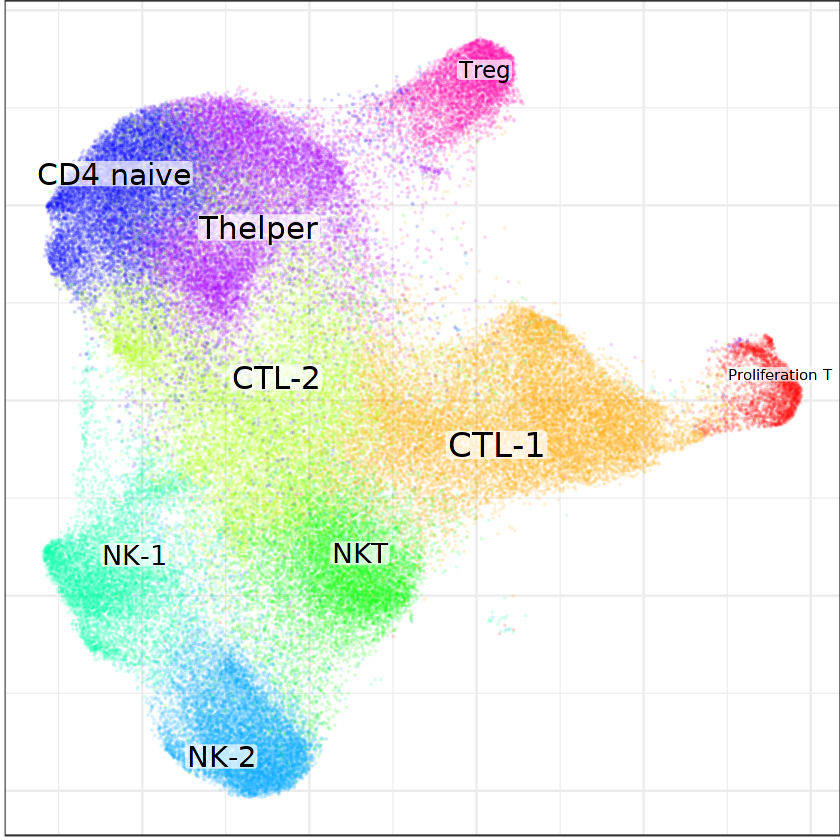

In [7]:
anoT = readRDS('final.anoT.rds')
scon$plotGraph(groups=anoT,size=0.1,plot.na=F,alpha=0.1)

In [8]:
set.seed(36)

anoT = as.factor(anoT)
anoT.pal <- setNames(rainbow(length(levels(anoT))),levels(anoT));

anoT.palf <- function(n) return(anoT.pal)

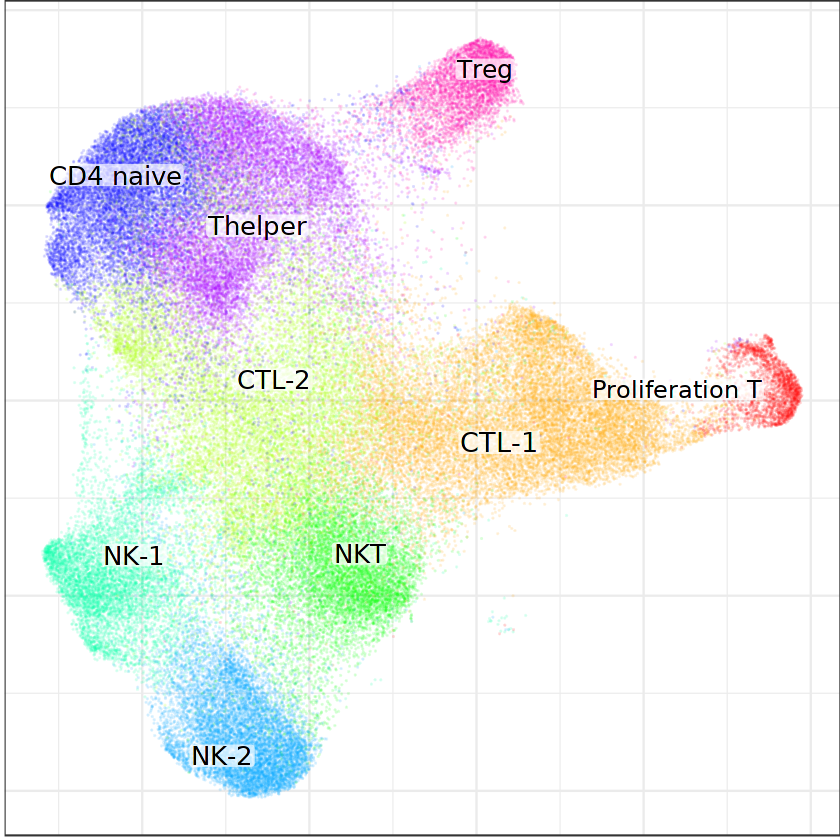

In [9]:
a2=scon$plotGraph(groups=anoT,raster=TRUE,plot.na=F,size=0.1,alpha=0.1,font.size = c(5, 5.5),palette=anoT.palf)
a2
#ggsave('F3a.new.pdf',a2,height=4,width=4)

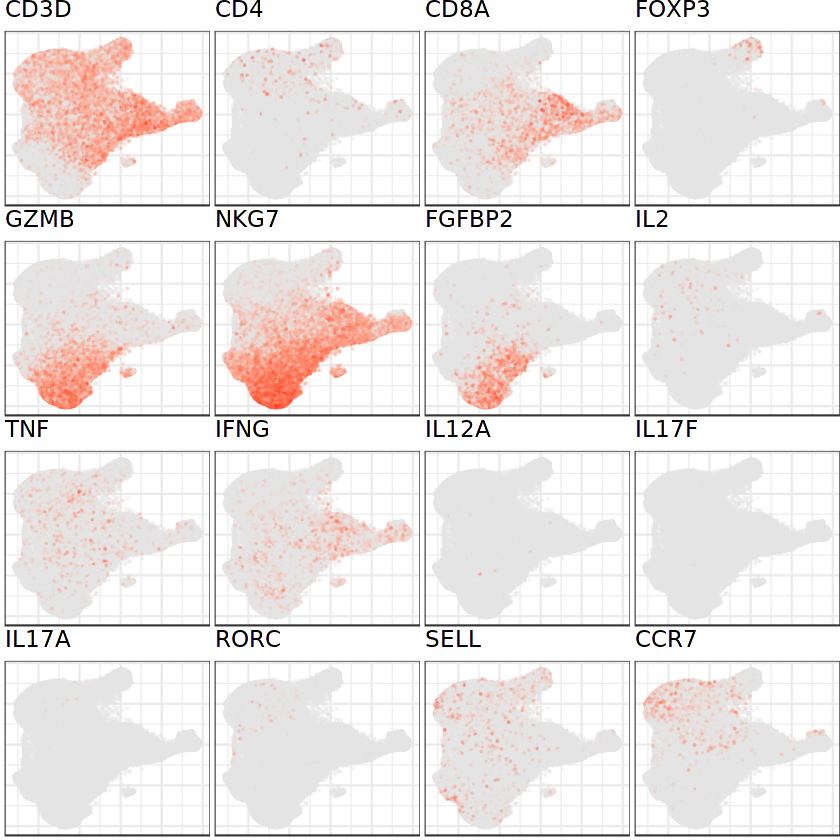

In [11]:
# key marker gene expression 
gs=c('CD3D','CD4','CD8A','FOXP3','GZMB','NKG7','FGFBP2','IL2', 'TNF' ,'IFNG', 'IL12A',"IL17F",  "IL17A","RORC" ,'SELL','CCR7' )

lis=lapply(sn(gs),function(x) scon$plotGraph(gene=x,plot.na=F,size=0.1,alpha=0.3,title=x))
b=  cowplot::plot_grid(plotlist=lis, ncol=4, nrow=4)
b


[1] "blue"
[1] "white"
[1] "red"


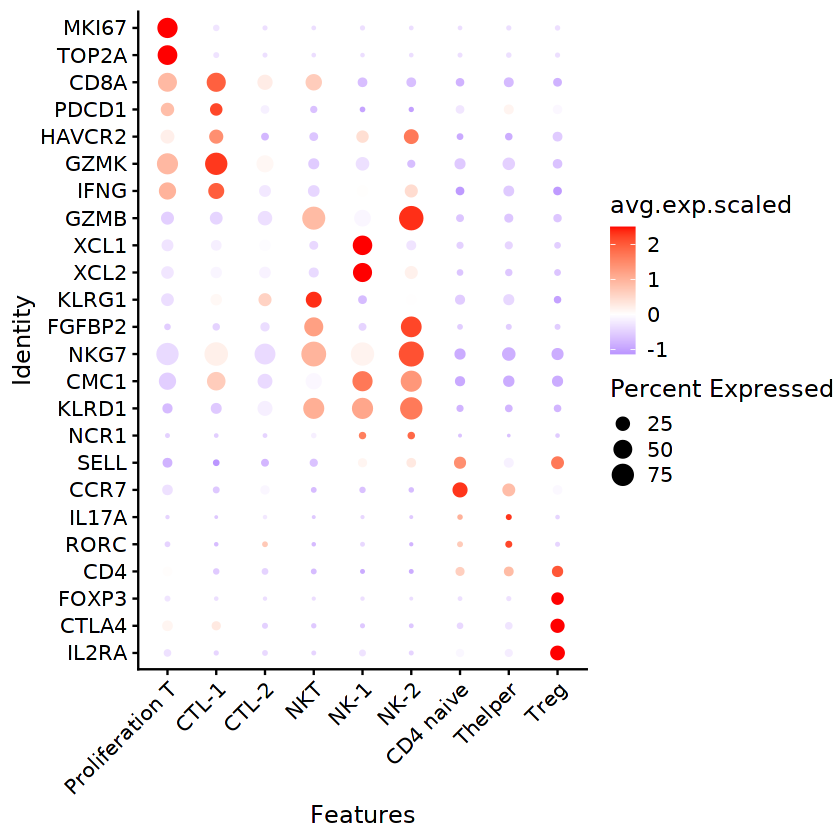

In [14]:
# dot plot for marker gene expression 
library(cowplot)
anoT2 = anoT
gs=c('MKI67','TOP2A','CD8A','PDCD1','HAVCR2','GZMK','IFNG','GZMB','XCL1','XCL2','KLRG1','FGFBP2','NKG7','CMC1','NCAM1 ','KLRD1','NCR1','SELL','CCR7',  "IL17A","RORC","CD4" , 'FOXP3', 'CTLA4','IL2RA')

#p2T=readRDS('Tcell.Normal.PTumor_new.p2Object.rds')

anoT2 = as.factor(anoT2)
anoT2=ordered(as.factor(anoT2),levels=c('Proliferation T','CTL-1','CTL-2','NKT','NK-1','NK-2','CD4 naive','Thelper','Treg'))


cname=names(anoT2)
aexp=t(p2T$counts)


cname = intersect(cname,colnames(aexp))

gs=intersect(gs,rownames(aexp))
#cname=intersect(cname,colnames(aexp))
p=Dotfig(gs,aexp[,cname],anoT2[cname],cols = c("blue","white", "red"))
p

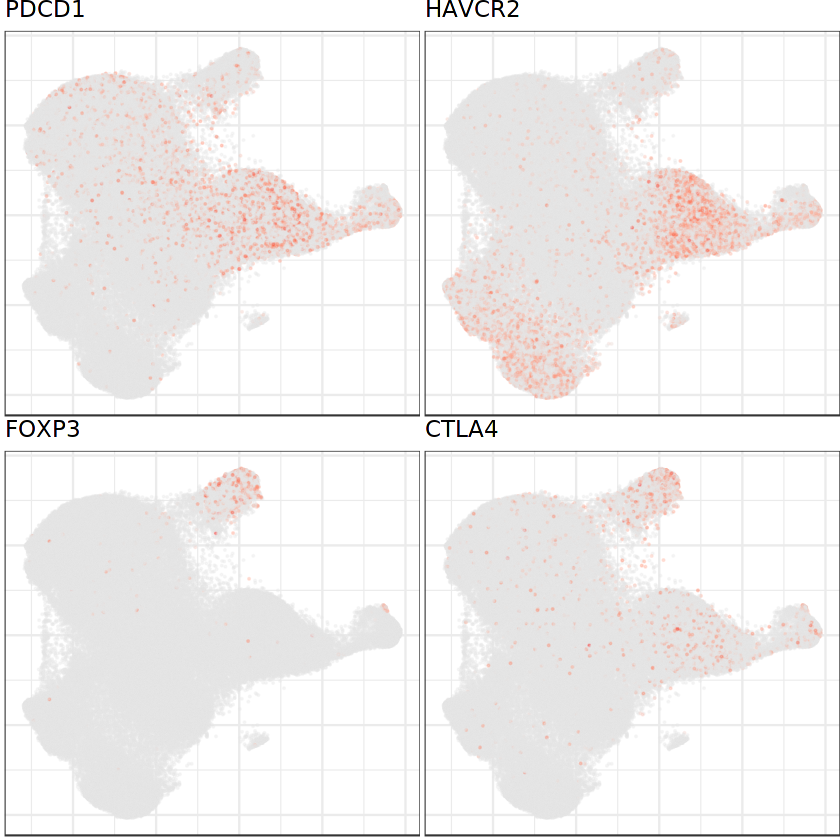

In [16]:
# Exhaustion signature expression 
gs=c('PDCD1','HAVCR2','FOXP3','CTLA4')

lis=lapply(sn(gs),function(x) scon$plotGraph(gene=x,plot.na=F,size=0.1,alpha=0.3,title=x))
b=  cowplot::plot_grid(plotlist=lis, ncol=2, nrow=2)
b

In [20]:
# caculate exhausiton signature score
ylab='Exhaustion Score'
sp2=  p2T

gs=readRDS('ExhaustionScore.csv')

cname=names(anoT)
cname=intersect(cname,rownames(sp2$counts))

df=Signature_score(anoT[cname],gs,sp2$counts,stype[cname],ssamp,min.num.cell=5,magnitude.normal = TRUE)

library(ggpubr)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.02116 0.03556 0.03958 0.05387 0.20489 


Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



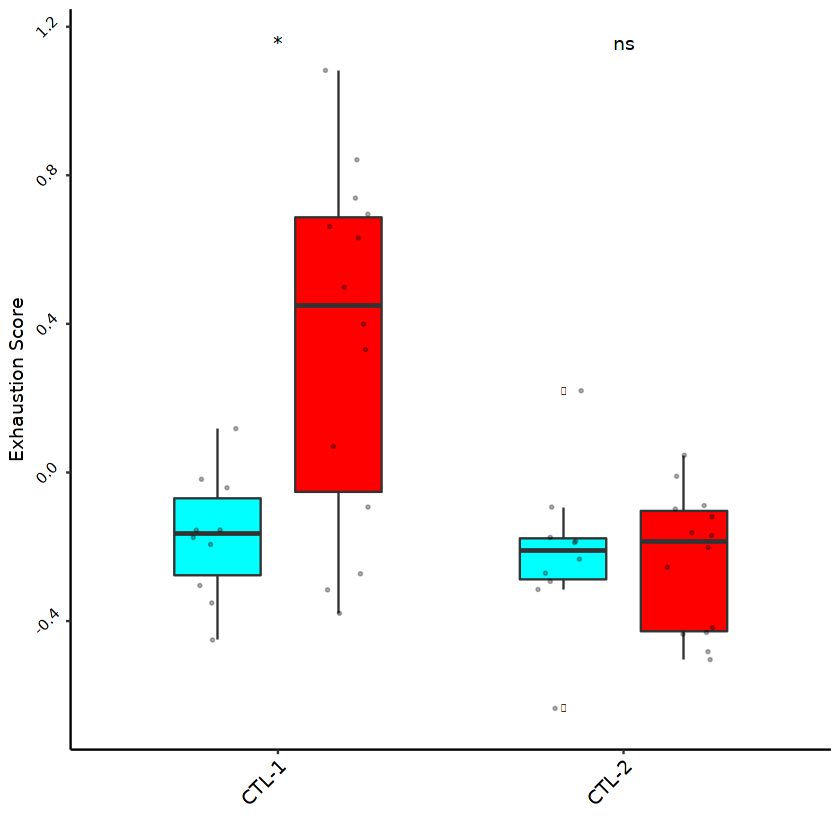

In [19]:
df2=df[df$cell %in% c('CTL-2','CTL-1'),]


df2$cell=df2$fraction
tmp=df2
ysize=11
xsize=11
limHeight=1.2
name2=ylab
tmp$cell2=apply(data.frame(rownames(tmp)),1,function(x) strsplit(x,'[|]')[[1]][1])

 p1 <- ggplot(tmp, aes(x=cell2,fill=fraction,y=score))+theme_classic() + geom_boxplot(outlier.shape = -1,width=0.5,position=position_dodge(width=0.7)) +theme_classic() + theme(axis.text.x = element_text(angle = 90, hjust = 1)) + xlab("")  + ylab(name2)
  p1=p1+ geom_point(data = tmp,size=0.5,color=adjustcolor(1,alpha=0.3), position = position_jitterdodge(0.3)) 
  
  p1=p1+ylim(c(min(tmp$score),max(tmp$score)*limHeight))
  #p1=p1+ geom_point(data = tmp,color=adjustcolor(1,alpha=0.3),fill='grey', size = 1, shape = 21)
  p1=p1+ theme(legend.position="none")
  p1=p1+theme(axis.text.x = element_text(angle = 45, hjust = 1))
  p1=p1+theme( axis.text.y = element_text(angle = 45, hjust = 0.5,color = "black"),axis.text.x=element_text(size=xsize,color = "black"),axis.title.y = element_text(size = ysize,color = "black"))
  
  p1=p1+scale_fill_manual(values=fraction.palette1)
p1=p1+ scale_y_continuous(expand = c(0.04, 0.04), limits=c(min(df2$score), max(df2$score)*1.05))+ ggpubr::stat_compare_means(label = "p.signif", label.x = 1.5) 
p1

In [21]:
# Treg activity
glist = scProcess:::getMarkers()
ylab='Treg activity'
gs=glist$TregActivity

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.00000 0.01988 0.02575 0.03697 0.32003 


Warning message:
“Removed 78 rows containing missing values (geom_signif).”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“font width unknown for character 0x1”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“font metrics unknown for character 0x1”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“font width unknown for character 0x1”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“font metrics unknown for character 0x1”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“font width unknown for character 0x1”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“font metrics unknown for character 0x1”
Warning message:
“Removed 78 rows containing missing values (geom_signif).”


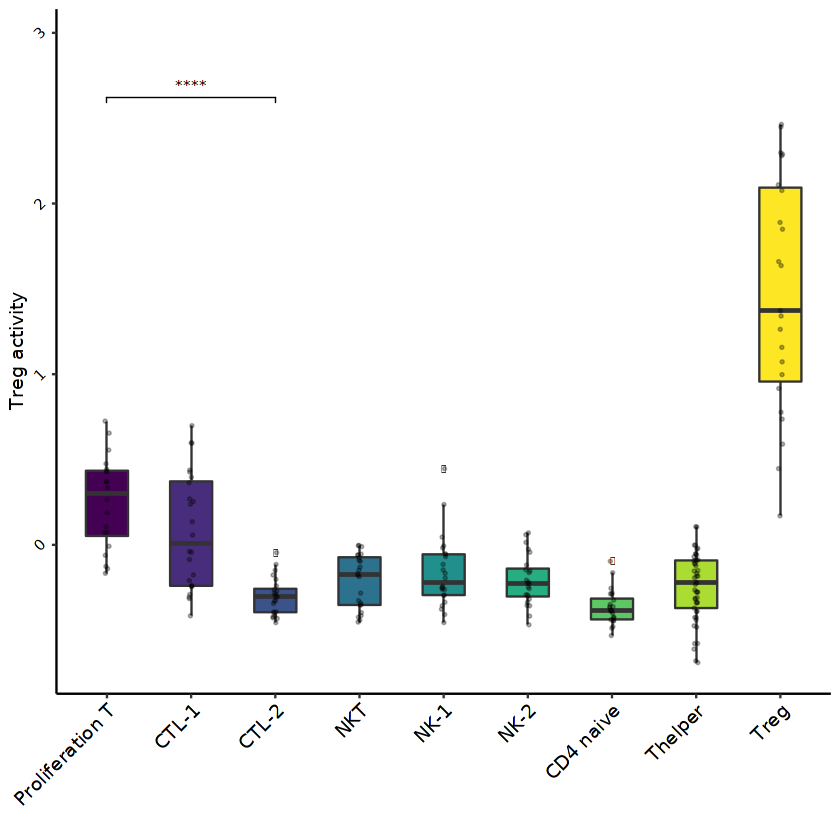

In [22]:

cname=names(anoT)
cname=intersect(cname,rownames(sp2$counts))

df=Signature_score(anoT[cname],gs,sp2$counts,stype[cname],ssamp,min.num.cell=5,magnitude.normal = TRUE)

library(ggpubr)
#df2=df[df$fraction=='T-HG',]
drawBoxplot(ylab,df,ylab,myeloid.col=NULL,limHeight=1.2,height=2.7,width=2.4)


Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“font width unknown for character 0x1”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“font metrics unknown for character 0x1”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“font width unknown for character 0x1”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“font metrics unknown for character 0x1”


.y.   group1 group2 p           p.adj   p.format p.signif method  
1 score Normal Tumor  0.000648564 0.00065 0.00065  ***      Wilcoxon

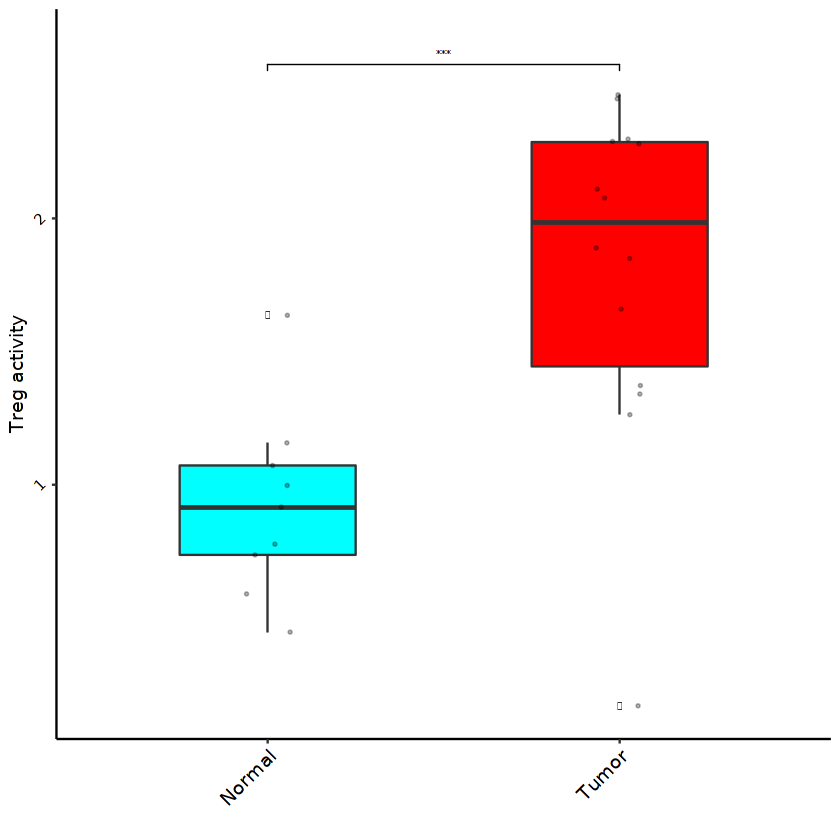

In [23]:
df2=df[df$cell=='Treg',]
df2$cell=df2$fraction


drawBoxplot('Treg',df2,ylab,myeloid.col=fraction.palette1,limHeight=1.08,height=2.4,width=2,dsize=2)

sig=compare_means(score ~ cell,  data = df2)
sig

In [24]:
# cell proportions

cname=names(anoT)
ano2=data.frame('Cell'=anoT[cname],'SampleType'=ssamp[cname])

# Annotation vs sample
tmp2 <- acast(ano2, Cell ~ SampleType, fun.aggregate=length)
tmp3 <- (sweep(tmp2, 2, colSums(tmp2), FUN='/'))
tmp4 <- melt(tmp3)
head(tmp4)
names(tmp4) <- c('cell', 'sample','pc.of.sample')

tmp4$Group=NULL
tmp4$Group=sample.groups[as.character(tmp4$sample)]



Using SampleType as value column: use value.var to override.



Var1            Var2           value     
1 Proliferation T RCC-BM1-Normal 0.01544163
2 CTL-1           RCC-BM1-Normal 0.09017912
3 CTL-2           RCC-BM1-Normal 0.19332922
4 NKT             RCC-BM1-Normal 0.11241507
5 NK-1            RCC-BM1-Normal 0.05682520
6 NK-2            RCC-BM1-Normal 0.15194565

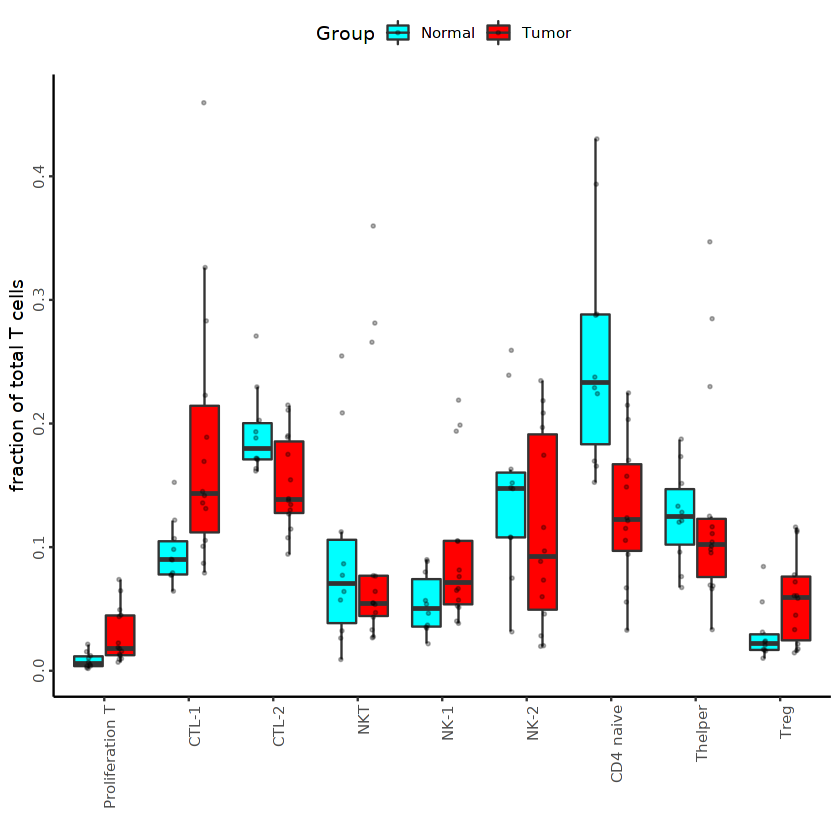

In [25]:
p <- ggplot(na.omit(tmp4),aes(x=cell,y=pc.of.sample,dodge=Group,fill=Group))+geom_boxplot(notch=FALSE,outlier.shape=NA)  +  geom_point(position = position_jitterdodge(jitter.width=0.1),color=adjustcolor(1,alpha=0.3),pch=19,size=0.5)+theme_classic()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1), axis.text.y = element_text(angle = 90, hjust = 0.5))  +xlab("") +ylab("fraction of total T cells")+theme(legend.position="top")+
  scale_fill_manual(values=fraction.palette1)
p


In [26]:

library(ggpubr)

df=tmp4
rsig=NULL
for (i in unique(df[,1])){
  tmp=df[df[,1]==i,]

  sig=compare_means(pc.of.sample ~ Group,  data = tmp) # 
  sig$cell=i
  rsig=rbind(rsig,sig)
  #sig[sig$p.signif!='ns',]
}

In [28]:
NKc = readRDS('/d0/home/meisl/Workplace/RCC/Figures/F3/conos/NK_conos.rds')
emb = readRDS('/d0/home/meisl/Workplace/RCC/Figures/F3/conos/NK.umap2.rds')
NKc$embedding = emb

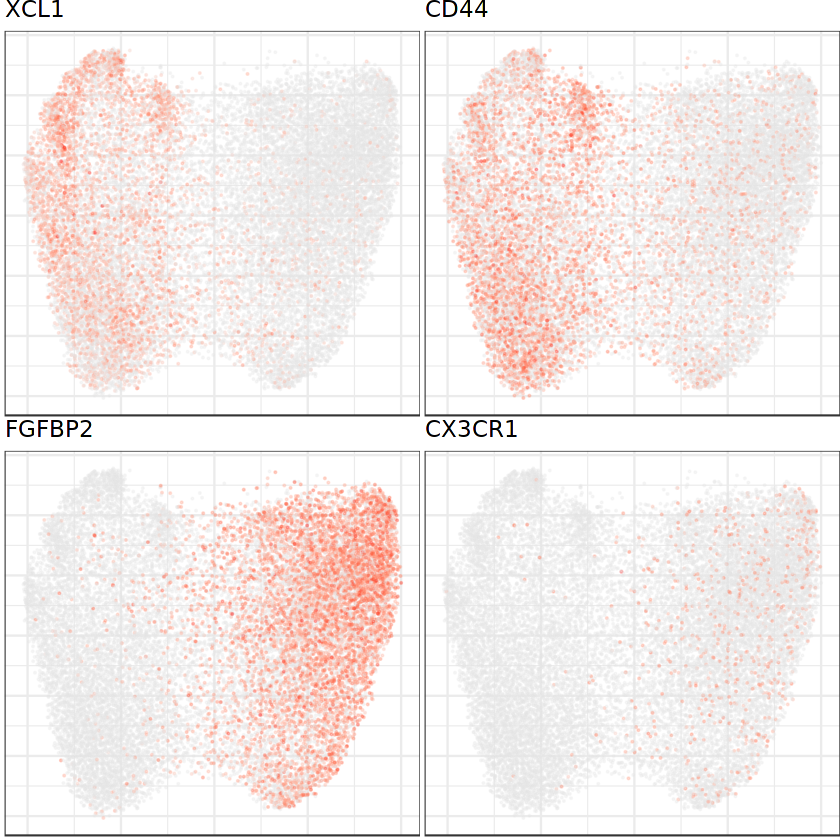

In [29]:
gs = c('XCL1','CD44','FGFBP2','CX3CR1')

pl = lapply(sn(gs),function(x) NKc$plotGraph(gene=x,title=x,size=0.1,alpha=0.3,plot.na=F))

b=  cowplot::plot_grid(plotlist=pl, ncol=2, nrow=2)
b

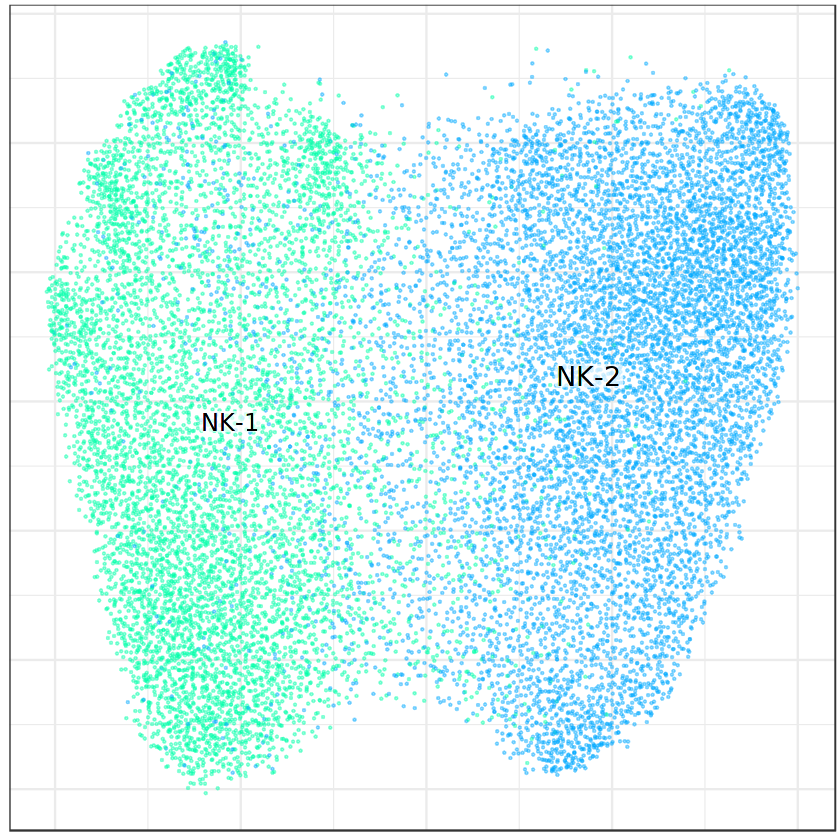

In [31]:
a2=NKc$plotGraph(groups=anof2,raster=TRUE,plot.na=F,size=0.4,alpha=0.4,font.size = c(5, 5.5),palette=anoT.palf)+theme(plot.margin = margin(0.1, 0.1, 0.1, 0.1, "cm"))
a2

In [ ]:
#  correlation of Proliferation T abundance and CTL-1 abundance

In [32]:
sample.groups
n1 = sample.groups[sample.groups=='Tumor'] %>% names()
n1


RCC-PR6-Normal  RCC-PR8-Normal  RCC-PR9-Normal  RCC-PR5-Normal  RCC-BM1-Normal 
         Normal          Normal          Normal          Normal          Normal 
 RCC-BM2-Normal  RCC-PR1-Normal  RCC-PR2-Normal  RCC-PR4-Normal  RCC-PR3-Normal 
         Normal          Normal          Normal          Normal          Normal 
 RCC-PR6-PTumor  RCC-PR7-PTumor  RCC-PR9-PTumor RCC-PR5-PTumor1 RCC-PR5-PTumor2 
          Tumor           Tumor           Tumor           Tumor           Tumor 
RCC-PR5-PTumor3  RCC-BM1-PTumor RCC-BM2-PTumor1 RCC-BM2-PTumor2  RCC-PR2-PTumor 
          Tumor           Tumor           Tumor           Tumor           Tumor 
 RCC-PR4-PTumor RCC-PR3-PTumor1 RCC-PR3-PTumor2 RCC-PR3-PTumor3 
          Tumor           Tumor           Tumor           Tumor 
Levels: Normal Tumor

[1] "RCC-PR6-PTumor"  "RCC-PR7-PTumor"  "RCC-PR9-PTumor"  "RCC-PR5-PTumor1"
 [5] "RCC-PR5-PTumor2" "RCC-PR5-PTumor3" "RCC-BM1-PTumor"  "RCC-BM2-PTumor1"
 [9] "RCC-BM2-PTumor2" "RCC-PR2-PTumor"  "RCC-PR4-PTumor"  "RCC-PR3-PTumor1"
[13] "RCC-PR3-PTumor2" "RCC-PR3-PTumor3"

`geom_smooth()` using formula 'y ~ x'



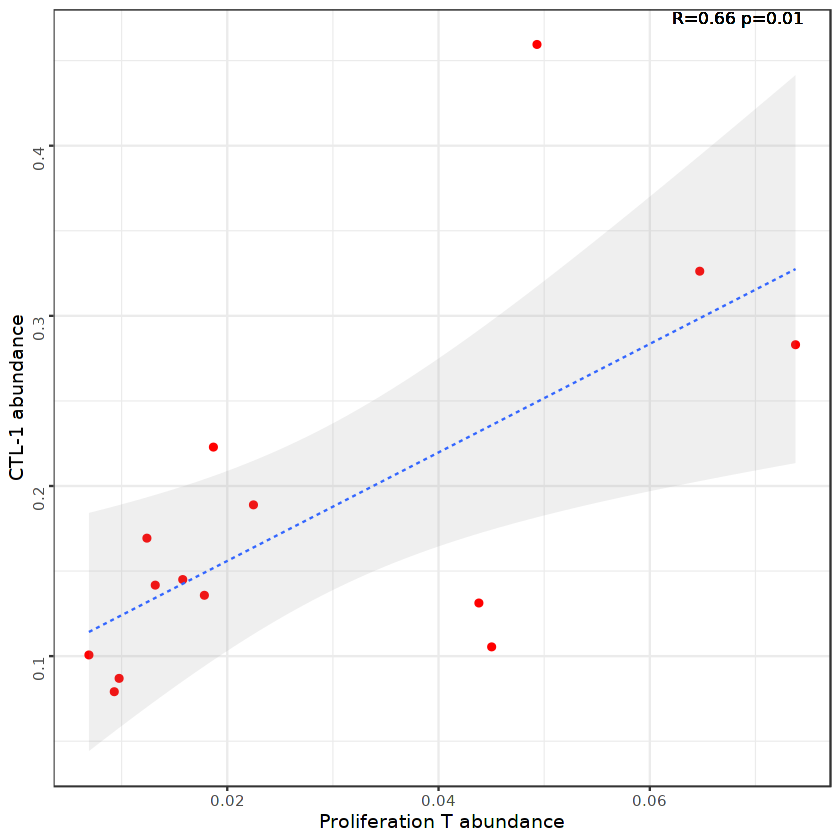

In [33]:
dat1=data.frame('x'=tmp3['Proliferation T',],'y'=tmp3['CTL-1',],'fraction'=sample.groups[colnames(tmp3)] )

dat1 = dat1[n1,]
ct <- cor.test(dat1$x,dat1$y,alternative='greater')

df=dat1
df$sample=rownames(df)
gg <- ggplot(na.omit(df), aes(x=x,y=y)) + geom_point(aes(color=fraction))  +
  geom_smooth(method='lm',linetype='dashed',alpha=0.15,size=0.5) + theme_bw() +
  theme(axis.text.y=element_text(angle=90))  + #guides(color=F) + #geom_text_repel(aes(color=sample))
  xlab("Proliferation T abundance") + ylab("CTL-1 abundance") +scale_color_manual(values=fraction.palette1)+
  geom_text(x=Inf,y=Inf,label=paste('R=',round(ct$estimate,2),' ','p=',round(ct$p.value,2),sep=''),hjust=1.2,vjust=1.2,size=3.5)

gg=gg+theme(legend.position='none')
gg

In [35]:
source('/d0-mendel/home/meisl/bin/FunctionLib/Lib/ploty.r')
#source('~/bin/violin.R')
modify_vlnplot.pvalue=function(gene,anoM,exp2,colp=NULL,pt.size=0){
  cname=names(anoM)
  ano2=anoM
  #exp2=t(p2all$counts)
  #data2=data.frame(exp2[gene,cname])
  #colnames(data2)=gene
  data2=data.frame(as.numeric(exp2[gene,cname]))

  rownames(data2)=cname
  colnames(data2)=gene


library(dplyr)
library(magrittr)
library(cowplot)
#a=SingleExIPlot.boxplot(
a=SingleExIPlot2(
  data = data2,
  idents = ano2,
  split = NULL,
  type = 'violin',
  sort = FALSE,
  y.max = NULL,
  adjust = 1,
  pt.size = pt.size,
  cols =colp, # cols = myeloid.pal,
  log = FALSE
)

#plot.margin = unit(c(-0.01, 0, -0.01, 0), "cm")
a=a+xlab("") + ylab(gene) + ggtitle("") +
  theme(legend.position = "none",
    #    axis.text.x = element_blank(),
        axis.ticks.x = element_blank(),
        axis.title.y = element_text(size = rel(1), angle = 0),
        axis.text.y = element_text(size = rel(1))#,        plot.margin = plot.margin 
) 
df =SingleExIPlot2.dat(

  data = data2,
  idents = ano2,
  split = NULL,
  type = 'violin',
  sort = FALSE,
  y.max = NULL,
  adjust = 1,
  pt.size = pt.size,
  cols =NULL, # cols = myeloid.pal,
  log = FALSE
)

colnames(df)[1]='gene'

  return(list('a'=a,'df'=df))
}

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



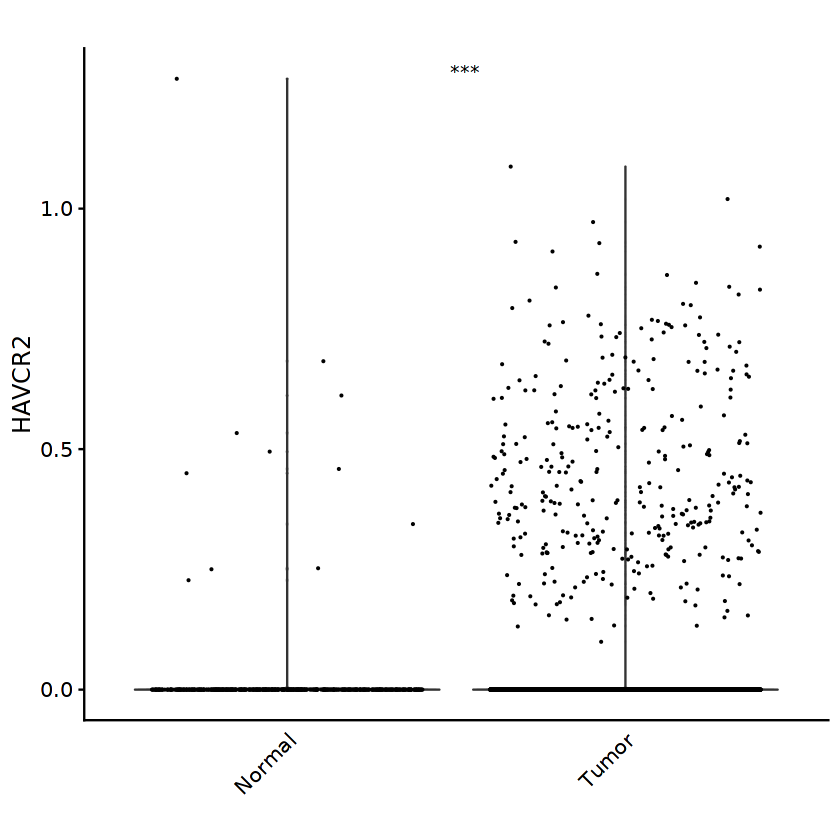

In [36]:
#  HAVCR2 expressio in Tregs
cname = names(anoT[anoT=='Treg'])

p=modify_vlnplot.pvalue(gene='HAVCR2',as.factor(stype[cname]),t(p2T$counts),colp=fraction.palette1,pt.size=0.1)

a = p$a+theme( axis.title.y = element_text(angle = 90, hjust = 0.5,color = "black"))+scale_fill_manual(values = fraction.palette1)+xlab('')+theme(legend.position = 'none')+ theme(plot.title = element_text(hjust = 0.5))+ ggpubr::stat_compare_means(label.x = 1.5,label = "p.signif") #label = "p.signif", 
df = p$df
a
a =a+ scale_y_continuous( expand=c(0, max(df$gene) * 0.1), limits=c(0, (max(df$gene) + max(df$gene) * 0.1)))


In [2]:
source('/home/meisl/bin/FunctionLib/Lib/pagodaLib.r')
source('~/bin/signature.score.R')
library(scProcess)
library(ggpubr)


spliced=readRDS('/home/meisl/Workplace/RCC/RNAvelocity/RCC.spliced.rds')
unspliced=readRDS('/home/meisl/Workplace/RCC/RNAvelocity/RCC.unspliced.rds')

output=function(appname,group4,emb,spliced,unspliced){

  obs=data.frame('name'=names(group4),'clusters'=group4)
  cell=names(group4)

  splicedf=spliced[,cell]
  unsplicedf=unspliced[,cell]
  gs=rownames(splicedf)

  Matrix::writeMM(splicedf,paste(appname,'.splicedf.mtx',sep=''))
  Matrix::writeMM(unsplicedf,paste(appname,'.unsplicedf.mtx',sep=''))
  write.csv(obs,paste(appname,'.obs.csv',sep=''),row.names=F)
  write.csv(emb,paste(appname,'.emb.csv',sep=''),row.names=F,col.names=F)
  write.csv(gs,paste(appname,'.gs.csv',sep=''),row.names=F,col.names=T)
}

anoE
      CD4 naive           CTL-1           CTL-2            NK-1            NK-2 
          11151           14512           12051            7075            8703 
            NKT Proliferation T         Thelper            Treg 
           7750            2042            6565            4326 

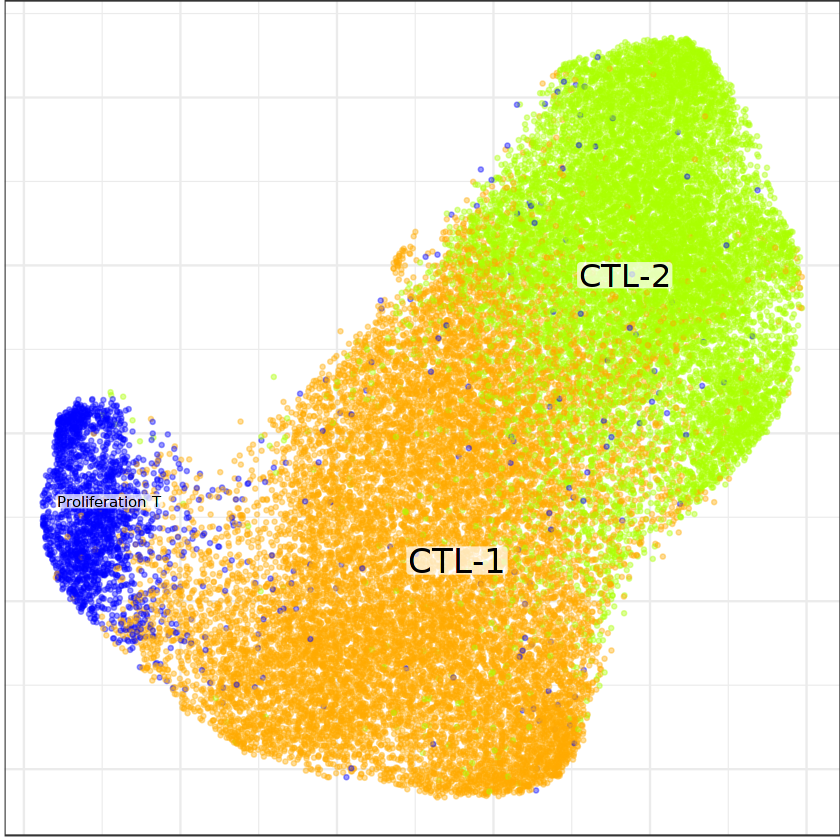

In [3]:
anoE=readRDS('/home/meisl/Workplace/RCC/Figures/F3/anoT.Nov.rds')
table(anoE)
con1 = readRDS('/home/meisl/Workplace/RCC/Figures.V2/Revision/velocity/conos/CTL.rm.cc.v2_conos.rds')
con1$plotGraph(groups=anoE)

In [5]:
sobj = readRDS('/home/meisl/Workplace/RCC/Figures.V2/Revision/velocity/conos/seurat.obj.rds')

In [6]:

library(Seurat)
s.genes <- cc.genes$s.genes
g2m.genes <- cc.genes$g2m.genes

marrow = sobj
marrow <- CellCycleScoring(marrow, s.features = s.genes, g2m.features = g2m.genes, set.ident = TRUE)
marrow <- ScaleData(marrow, vars.to.regress = c("S.Score", "G2M.Score"), features = rownames(marrow))
marrow <- FindNeighbors(marrow, reduction = "pca", dims = 1:20)
marrow = RunPCA(marrow)
marrow = RunUMAP(marrow, reduction="pca",dims=1:20)



Attaching SeuratObject


Attaching package: ‘Seurat’


The following object is masked from ‘package:SummarizedExperiment’:

    Assays




ERROR: Error in UseMethod(generic = "DefaultAssay", object = object): no applicable method for 'DefaultAssay' applied to an object of class "list"


In [ ]:
emb1 = marrow@reductions$umap@cell.embeddings

embeddingPlot(emb1,groups = anoE)